# Example Jupyter Notebook
## Leveraging Digital Assessment Techniques for Enhanced Learning: Community of Practice

**January 18, 2024**  
12:00 - 13:20  
SCI 331

This is a Markdown cell that can be used to:
 - deliver notes
 - shown figures
 - link to enternal resources
 
Here, for example, is the Markdown logo...
<p>
<center>
<img src="https://raw.githubusercontent.com/UBC-Okanagan-Physics-Labs/Digital-Assessment-Techniques-CoP/3f2a572d3ab18a3ba348a490b096deb180a2499d/images/Markdown-mark.svg" alt="Markdown logo" style="width: 20%; height: auto;" />
</center>
</p>
...and here is a link to a Markdown <a href="https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet">cheat sheet</a>.  You can use html commands in a Markdown cell too.

***
Let's first import some useful Python modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We can also import custom functions stored in PHYS121.py

In [2]:
import PHYS121
PHYS121.Installer()

To use auto-grading with otter-grader, we must import and initialize otter.

In [3]:
# Import Otter for the purposes of autograding
import otter

# Initialize Otter (for the purposes of auto-grading some cells)
grader = otter.Notebook("Digital_Assessment_Techniques_Example_Jupyter_Notebook_otter.ipynb")

Import some data contained in the file "Lab_6_Part_3_Data.csv" into a Pandas dataframe.

In [4]:
# Hitting 'Shift' + 'Enter' will import the file and a data table will be printed below.
filename = 'Lab_6_Part_3_Data.csv'
df = pd.read_csv(filename)

# Display the dateFrame
df

,Time (s),V (V)
0,0.0000,5.911172
1,0.3333,5.816545
2,0.6666,5.718864
3,0.9999,5.636447
4,1.3332,5.554029
...,...,...
176,58.6608,0.431929
177,58.9941,0.422772
178,59.3274,0.419719
179,59.6607,0.410562


The data is the voltage $V$ across a capacitor $C$ discharging through a resistor $R$ as a function of time $t$.  The expected time dependence is given by:
$$
V = V_0 e^{-t/\tau},
$$
where $V_0$ is the capacitor voltage at time $t = 0$ and $\tau = RC$ is a time constant.

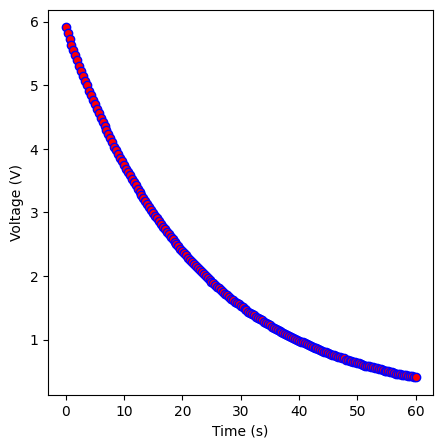

In [5]:
PHYS121.Scatter(xData = df["Time (s)"], 
                yData = df["V (V)"],
                xlabel = "Time (s)",
                ylabel = "Voltage (V)");

The experimental data can be linearized by taking the natural logarithm of the voltage.  In Python (NumPy), the natural logarithm is evaluated using:
```python
np.log(V)
```
We can take the natural logarithm of the voltage and add the result as a new column in the Pandas dataframe.

In [6]:
df.insert(2, "lnV", np.log(df["V (V)"]), True)
df

,Time (s),V (V),lnV
0,0.0000,5.911172,1.776844
1,0.3333,5.816545,1.760706
2,0.6666,5.718864,1.743770
3,0.9999,5.636447,1.729254
4,1.3332,5.554029,1.714524
...,...,...,...
176,58.6608,0.431929,-0.839494
177,58.9941,0.422772,-0.860923
178,59.3274,0.419719,-0.868169
179,59.6607,0.410562,-0.890229


Use the same PHYS121.Scatter() function to confirm that $ln(V)$ versus $t$ is linear.

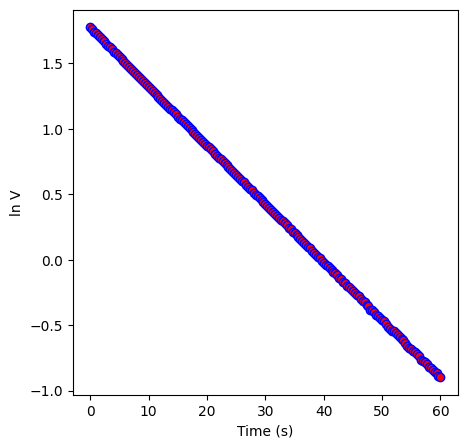

In [7]:
PHYS121.Scatter(xData = df["Time (s)"], 
                yData = df["lnV"],
                xlabel = "Time (s)",
                ylabel = "ln V");

Let's fit the data to a straight line using the 'PHYS121.LinearFit()' function.

$y = m\,x + b$

This is an **UNWEIGHTED** fit.

,,Value
slope,$m =$,-0.044560+/-0.000020
$y$-intercept,$b =$,1.76551+/-0.00068


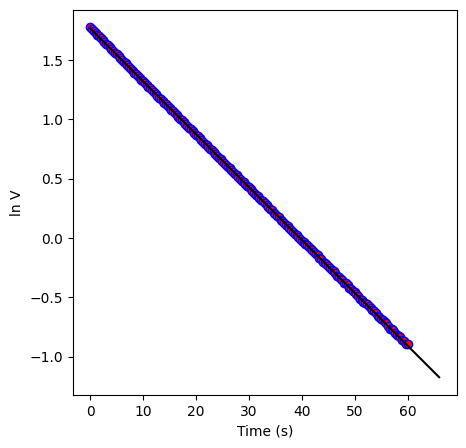

In [8]:
m, b, err_m, err_b, fig = PHYS121.LinearFit(xData = df["Time (s)"], 
                yData = df["lnV"],
                xlabel = "Time (s)",
                ylabel = "ln V")

Finally, the slope and its uncertainty can be used to find the discharging time contant:
$$
\tau = RC = -m^{-1}
$$
and:
$$
\Delta\tau = \frac{\Delta m}{m^2}
$$

***
**<span style="color:blue">Question 1</span>** **<span style="color:red">(2 marks)</span>**  
In the cell below, enter expressions to calculate the discharging time constant $\tau$ and its uncertainty $\Delta\tau$.

**<span style="color:blue">Answer 1</span>**  
Replace the ... in the cell below with your answer.    
*** Please do not change anything to the left of the equals sign. ***

In [9]:
tau = -1/m # SOLUTION
err_tau = err_m/m**2 # SOLUTION

In [10]:
""" # BEGIN TEST CONFIG
hidden: False
points: 0
failure_message: tau must evaluate to a number. 
""" # END TEST CONFIG 
isinstance(tau, float)

True

In [11]:
""" # BEGIN TEST CONFIG
hidden: False
points: 0
failure_message: err_tau must evaluate to a number. 
""" # END TEST CONFIG 
isinstance(err_tau, float)

True

In [12]:
""" # BEGIN TEST CONFIG
hidden: False
points: 1
failure_message: Double check your expression for tau. 
""" # END TEST CONFIG 
tau == -1/m

True

In [13]:
""" # BEGIN TEST CONFIG
hidden: False
points: 1
failure_message: Double check your expression for err_tau. 
""" # END TEST CONFIG 
err_tau == err_m/m**2

True

In [14]:
print(f'The experimental time constant is RC = {tau:.3f} +/- {err_tau:.3f} s')

The experimental time constant is RC = 22.442 +/- 0.010 s


***
<img src="https://raw.githubusercontent.com/UBC-Okanagan-Physics-Labs/Digital-Assessment-Techniques-CoP/main/images/ubc-logo-full.jpg" width="500"/>

Last update: January 9, 2024